In [46]:
import os
import torch
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

Displaying 5 samples from the Train dataset...


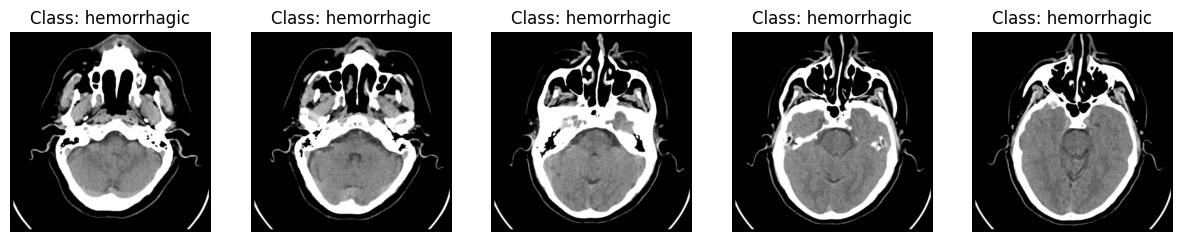

Displaying 5 samples from the Validation dataset...


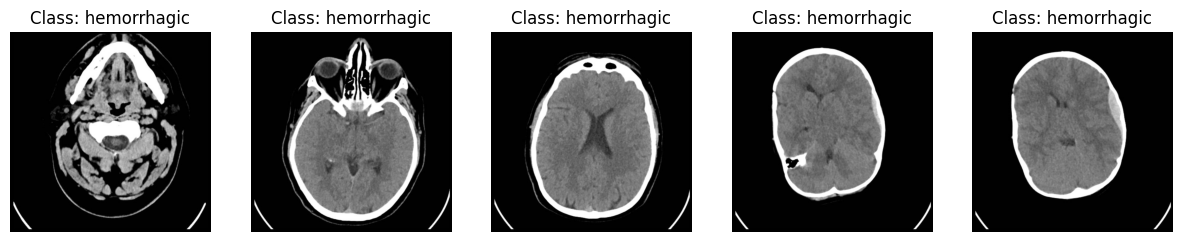

Displaying 5 samples from the Test dataset...


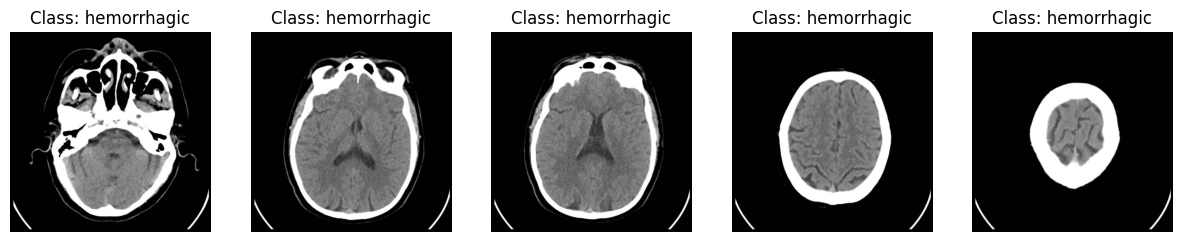

Number of training samples: 1843
Number of validation samples: 235
Number of test samples: 437
Class names: ['hemorrhagic', 'ischaemic']


In [47]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets

# Correct paths to data directories
train_dir = r"C:\GITHUB COLLECTIONS\brain-stroke-prediction\Data\Train"
test_dir = r"C:\GITHUB COLLECTIONS\brain-stroke-prediction\Data\Test"
val_dir = r"C:\GITHUB COLLECTIONS\brain-stroke-prediction\Data\Validation"

# Load datasets without transformations
train_dataset = datasets.ImageFolder(root=train_dir)
test_dataset = datasets.ImageFolder(root=test_dir)
val_dataset = datasets.ImageFolder(root=val_dir)

# Function to display sample images
def display_samples(dataset, dataset_name, num_samples=5):
    print(f"Displaying {num_samples} samples from the {dataset_name} dataset...")
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    for i in range(num_samples):
        image, label = dataset[i]
        axes[i].imshow(image)  # Directly display PIL.Image
        axes[i].set_title(f"Class: {dataset.classes[label]}")
        axes[i].axis('off')
    plt.show()

# Display 5 samples from each dataset
display_samples(train_dataset, "Train", num_samples=5)
display_samples(val_dataset, "Validation", num_samples=5)
display_samples(test_dataset, "Test", num_samples=5)

# Check dataset statistics
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Class names: {train_dataset.classes}")


In [48]:
# Data Transformation 
from torchvision import transforms

# Define image transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),               # Resize all images to 224x224
        transforms.RandomHorizontalFlip(),          # Apply horizontal flip
        transforms.RandomRotation(10),             # Rotate images by up to ±10 degrees
        transforms.ToTensor(),                      # Convert image to PyTorch tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
    ]),
    'validation': transforms.Compose([
        transforms.Resize((224, 224)),               # Resize for validation
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),               # Resize for testing
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                             std=[0.229, 0.224, 0.225])
    ]),
}


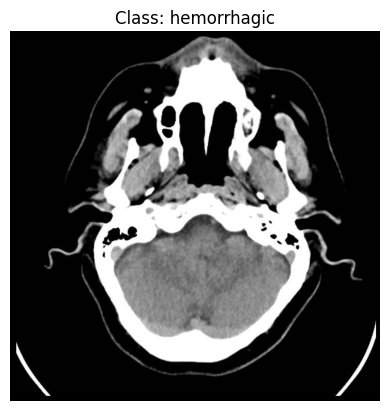

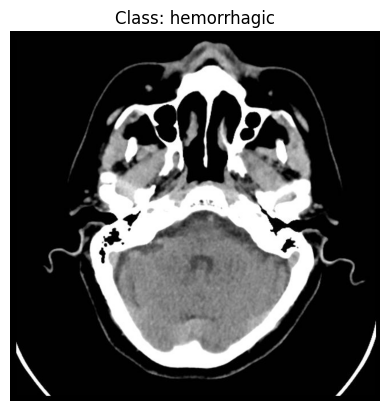

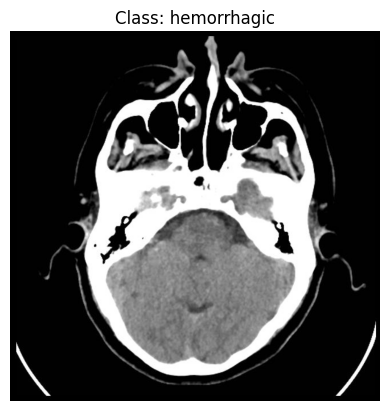

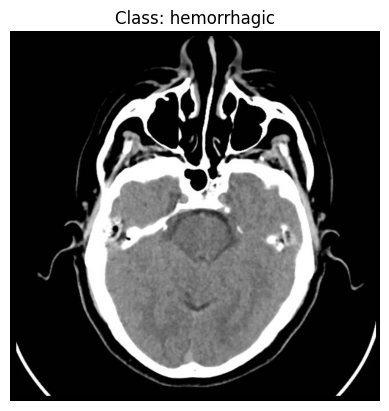

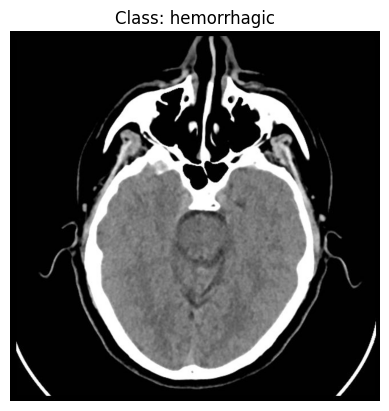

In [49]:
import matplotlib.pyplot as plt
import torch

def show_transformed_images(dataset, num_samples=5):
    for i in range(num_samples):
        image, label = dataset[i]
        
        # Ensure the image is a tensor before calling permute
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
            image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # De-normalize
            image = image.numpy().clip(0, 1)
        else:
            # If it's a PIL image, convert to numpy directly
            image = image
        
        plt.imshow(image)
        plt.title(f"Class: {dataset.classes[label]}")
        plt.axis('off')
        plt.show()

# Visualize training samples
show_transformed_images(train_dataset)


In [50]:
# Random Horizontal Flip and Random Rotation can also be added here
data_transforms['train'] = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),  # Random rotation between -15 and +15 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [51]:
from torch.utils.data import DataLoader
from torchvision import datasets

train_dataset = datasets.ImageFolder(root=train_dir, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=val_dir, transform=data_transforms['validation'])
test_dataset = datasets.ImageFolder(root=test_dir, transform=data_transforms['test'])

# Create DataLoaders for each dataset
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=False  # Keep the last batch, even if it's smaller than the batch size
)
 # Shuffling training data
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)    # No shuffling for validation
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # No shuffling for test


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


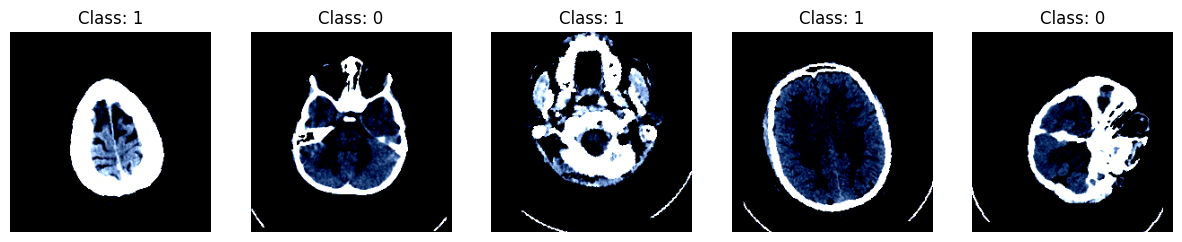

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(img):
    # Convert a tensor image to a numpy array and denormalize it
    img = img / 2 + 0.5  # Denormalize to bring the image back to the original range
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert (C, H, W) to (H, W, C) for display
    plt.show()

def visualize_samples(data_loader, num_samples=5):
    # Get a batch of data
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    
    # Plot images in a grid
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert to HWC format
        ax.set_title(f"Class: {labels[i].item()}")
        ax.axis('off')  # Hide axes
    plt.show()

# Example: Visualize 5 samples from the training set
visualize_samples(train_loader, num_samples=5)


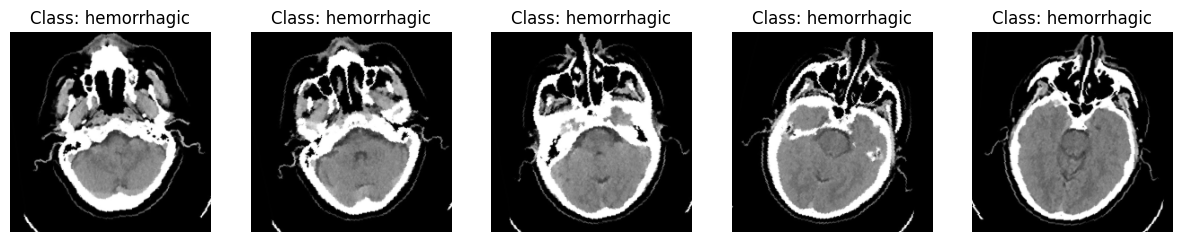

In [53]:
import matplotlib.pyplot as plt
import torch

def show_transformed_images(dataset, num_samples=5):
    # Display a few transformed images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C)
        image = image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # De-normalize
        axes[i].imshow(image.numpy())
        axes[i].set_title(f"Class: {dataset.classes[label]}")
        axes[i].axis('off')
    plt.show()

# Show some training images
show_transformed_images(train_dataset)


In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Example: Class weights in the loss function
class_counts = [len(os.listdir(os.path.join(train_dir, c))) for c in os.listdir(train_dir)]
weights = [sum(class_counts) / c for c in class_counts]  # Inverse frequency weighting
class_weights = torch.FloatTensor(weights).to(device)  # Move to GPU if needed

# CrossEntropyLoss with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # First Convolutional Block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        # Second Convolutional Block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        # Third Convolutional Block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Fourth Convolutional Block
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        
        # Fifth Convolutional Block
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        
        # Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * 7 * 7, 1024)  # Increase dimensionality for a deeper layer
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 2)  # Output layer for two classes

    def forward(self, x):
        # Convolutional Block 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Convolutional Block 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Convolutional Block 3
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # Convolutional Block 4
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        # Convolutional Block 5
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Regularization
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Regularization
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # Output layer (no activation for logits)
        
        return x


In [57]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Check if CUDA is available
    model.to(device)  # Move model to the appropriate device (GPU or CPU)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device

            optimizer.zero_grad()  # Zero out the gradients from the previous step

            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation to compute gradients
            optimizer.step()  # Update model parameters

            running_loss += loss.item() * images.size(0)  # Accumulate the loss

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        # Calculate the average training loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train

        # Validation loop
        model.eval()  # Set model to evaluation mode
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():  # No need to compute gradients during validation
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)  # Move data to device

                outputs = model(images)  # Forward pass
                val_loss = criterion(outputs, labels)  # Compute loss

                running_val_loss += val_loss.item() * images.size(0)  # Accumulate the loss

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        # Calculate the average validation loss and accuracy
        val_loss = running_val_loss / len(val_loader.dataset)
        val_accuracy = 100 * correct_val / total_val

        # Print epoch statistics
        print(f"Epoch {epoch + 1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    print("Training complete")


In [58]:
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=70   )


Epoch 1/70, Train Loss: 0.9801, Train Accuracy: 53.07%, Validation Loss: 0.6512, Validation Accuracy: 66.81%
Epoch 2/70, Train Loss: 0.6962, Train Accuracy: 58.65%, Validation Loss: 0.6075, Validation Accuracy: 64.68%
Epoch 3/70, Train Loss: 0.6396, Train Accuracy: 63.65%, Validation Loss: 0.6221, Validation Accuracy: 62.13%
Epoch 4/70, Train Loss: 0.6248, Train Accuracy: 64.08%, Validation Loss: 0.5921, Validation Accuracy: 64.68%
Epoch 5/70, Train Loss: 0.6203, Train Accuracy: 64.51%, Validation Loss: 0.6543, Validation Accuracy: 61.70%
Epoch 6/70, Train Loss: 0.5961, Train Accuracy: 65.93%, Validation Loss: 0.6112, Validation Accuracy: 67.23%
Epoch 7/70, Train Loss: 0.5815, Train Accuracy: 68.86%, Validation Loss: 0.6939, Validation Accuracy: 50.21%
Epoch 8/70, Train Loss: 0.5965, Train Accuracy: 67.28%, Validation Loss: 0.5246, Validation Accuracy: 71.91%
Epoch 9/70, Train Loss: 0.5914, Train Accuracy: 66.47%, Validation Loss: 0.7372, Validation Accuracy: 48.94%
Epoch 10/70, Train 

In [59]:
torch.save(model.state_dict(), 'best_model.pth')


In [60]:
def evaluate_model(model, test_loader, criterion):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Check if CUDA is available
    model.to(device)  # Move model to the appropriate device (GPU or CPU)
    
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            running_loss += loss.item() * images.size(0)  # Accumulate the loss
            
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            correct_predictions += (predicted == labels).sum().item()  # Count correct predictions
            total_predictions += labels.size(0)  # Count total samples

    # Calculate the average loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = 100 * correct_predictions / total_predictions
    
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")


evaluate_model(model, test_loader, criterion)


Test Loss: 0.2699
Test Accuracy: 89.02%


In [61]:
torch.save(model.state_dict(), 'model.pth')
print("Model saved successfully!")


Model saved successfully!
